# LimberJack Target Practice

## Model

In [1]:
] activate "../../Glamdring/MicroCanonicalHMC.jl"

  Activating project at `~/Glamdring/MicroCanonicalHMC.jl`


In [2]:
using LinearAlgebra
using Turing
using LimberJack
using DataFrames
using CSV
using YAML
using NPZ
using PythonCall
sacc = pyimport("sacc");

using Plots

using Revise
using MicroCanonicalHMC

[ Info: Precompiling MicroCanonicalHMC [234d2aa0-2291-45f7-9047-6fa6f316b0a8]


In [3]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DECALS/DECALS.yml"
sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)
DECALS_meta, DECALS_files = make_data(sacc_file, yaml_file)

DECALS_data = DECALS_meta.data
DECALS_cov = DECALS_meta.cov;

DECALS__0 DECALS__0 3
DECALS__1 DECALS__1 7
DECALS__2 DECALS__2 9
DECALS__3 DECALS__3 11


In [4]:
@model function DECALS_model(data)
    #KiDS priors
    Ωm ~ Uniform(0.2, 0.6)
    Ωb ~ Uniform(0.028, 0.065)
    h ~ TruncatedNormal(72, 5, 0.64, 0.82)
    s8 ~ Uniform(0.4, 1.2)
    ns ~ Uniform(0.84, 1.1)

    DECALS__0_b ~ Uniform(0.8, 3.0)
    DECALS__1_b ~ Uniform(0.8, 3.0)
    DECALS__2_b ~ Uniform(0.8, 3.0)
    DECALS__3_b ~ Uniform(0.8, 3.0)
    DECALS__0_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DECALS__1_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DECALS__2_dz ~ TruncatedNormal(0.0, 0.006, -0.2, 0.2)
    DECALS__3_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)

    nuisances = Dict("DECALS__0_b" => DECALS__0_b,
                     "DECALS__1_b" => DECALS__1_b,
                     "DECALS__2_b" => DECALS__2_b,
                     "DECALS__3_b" => DECALS__3_b,
                     "DECALS__0_dz" => DECALS__0_dz,
                     "DECALS__1_dz" => DECALS__1_dz,
                     "DECALS__2_dz" => DECALS__2_dz,
                     "DECALS__3_dz" => DECALS__3_dz)

    cosmology = Cosmology(Ωm, Ωb, h, ns, s8,
                          tk_mode="EisHu",
                          Pk_mode="Halofit")

    theory = Theory(cosmology, DECALS_meta, DECALS_files; Nuisances=nuisances)
    data ~ MvNormal(theory, DECALS_cov)
end

DECALS_model (generic function with 2 methods)

In [5]:
DECALS_model_cond = DECALS_model(DECALS_data)
DECALS_target = TuringTarget(DECALS_model_cond);

In [6]:
sacc_path = "/home/jaimerz/PhD/LimberJack.jl/data/FD/cls_FD_covG.fits"
yaml_path = "/home/jaimerz/PhD/LimberJack.jl/data/DESY1/DESY1.yml"
sacc_file = sacc.Sacc().load_fits(sacc_path)
yaml_file = YAML.load_file(yaml_path)
DES_meta, DES_files = make_data(sacc_file, yaml_file)

DES_data = DES_meta.data
DES_cov = DES_meta.cov;

DESgc__0 DESgc__0 5
DESgc__1 DESgc__1 8
DESgc__2 DESgc__2 10
DESgc__3 DESgc__3 11
DESgc__4 DESgc__4 13
DESgc__0 DESwl__0 5
DESgc__0 DESwl__1 5
DESgc__0 DESwl__2 5
DESgc__0 DESwl__3 5
DESgc__1 DESwl__0 8
DESgc__1 DESwl__1 8
DESgc__1 DESwl__2 8
DESgc__1 DESwl__3 8
DESgc__2 DESwl__0 10
DESgc__2 DESwl__1 10
DESgc__2 DESwl__2 10
DESgc__2 DESwl__3 10
DESgc__3 DESwl__0 11
DESgc__3 DESwl__1 11
DESgc__3 DESwl__2 11
DESgc__3 DESwl__3 11
DESgc__4 DESwl__0 13
DESgc__4 DESwl__1 13
DESgc__4 DESwl__2 13
DESgc__4 DESwl__3 13
DESwl__0 DESwl__0 24
DESwl__0 DESwl__1 24
DESwl__0 DESwl__2 24
DESwl__0 DESwl__3 24
DESwl__1 DESwl__1 24
DESwl__1 DESwl__2 24
DESwl__1 DESwl__3 24
DESwl__2 DESwl__2 24
DESwl__2 DESwl__3 24
DESwl__3 DESwl__3 24


In [7]:
@model function DES_model(data)
    #KiDS priors
    Ωm ~ Uniform(0.2, 0.6)
    Ωb ~ Uniform(0.028, 0.065)
    h ~ TruncatedNormal(72, 5, 0.64, 0.82)
    s8 ~ Uniform(0.4, 1.2)
    ns ~ Uniform(0.84, 1.1)

    DESgc__0_b ~ Uniform(0.8, 3.0)
    DESgc__1_b ~ Uniform(0.8, 3.0)
    DESgc__2_b ~ Uniform(0.8, 3.0)
    DESgc__3_b ~ Uniform(0.8, 3.0)
    DESgc__4_b ~ Uniform(0.8, 3.0)
    DESgc__0_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DESgc__1_dz ~ TruncatedNormal(0.0, 0.007, -0.2, 0.2)
    DESgc__2_dz ~ TruncatedNormal(0.0, 0.006, -0.2, 0.2)
    DESgc__3_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)
    DESgc__4_dz ~ TruncatedNormal(0.0, 0.01, -0.2, 0.2)
    DESwl__0_dz ~ TruncatedNormal(-0.001, 0.016, -0.2, 0.2)
    DESwl__1_dz ~ TruncatedNormal(-0.019, 0.013, -0.2, 0.2)
    DESwl__2_dz ~ TruncatedNormal(0.009, 0.011, -0.2, 0.2)
    DESwl__3_dz ~ TruncatedNormal(-0.018, 0.022, -0.2, 0.2)
    DESwl__0_m ~ Normal(0.012, 0.023)
    DESwl__1_m ~ Normal(0.012, 0.023)
    DESwl__2_m ~ Normal(0.012, 0.023)
    DESwl__3_m ~ Normal(0.012, 0.023)
    A_IA ~ Uniform(-5, 5) 
    alpha_IA ~ Uniform(-5, 5)

    nuisances = Dict("DESgc__0_b" => DESgc__0_b,
                     "DESgc__1_b" => DESgc__1_b,
                     "DESgc__2_b" => DESgc__2_b,
                     "DESgc__3_b" => DESgc__3_b,
                     "DESgc__4_b" => DESgc__4_b,
                     "DESgc__0_dz" => DESgc__0_dz,
                     "DESgc__1_dz" => DESgc__1_dz,
                     "DESgc__2_dz" => DESgc__2_dz,
                     "DESgc__3_dz" => DESgc__3_dz,
                     "DESgc__4_dz" => DESgc__4_dz,
                     "DESwl__0_dz" => DESwl__0_dz,
                     "DESwl__1_dz" => DESwl__1_dz,
                     "DESwl__2_dz" => DESwl__2_dz,
                     "DESwl__3_dz" => DESwl__3_dz,
                     "DESwl__0_m" => DESwl__0_m,
                     "DESwl__1_m" => DESwl__1_m,
                     "DESwl__2_m" => DESwl__2_m,
                     "DESwl__3_m" => DESwl__3_m,
                     "A_IA" => A_IA,
                     "alpha_IA" => alpha_IA,)

    cosmology = Cosmology(Ωm, Ωb, h, ns, s8,
                          tk_mode="EisHu",
                          Pk_mode="Halofit")

    theory = Theory(cosmology, DES_meta, DES_files; Nuisances=nuisances)
    data ~ MvNormal(theory, DES_cov)
end

DES_model (generic function with 2 methods)

In [8]:
DES_model_cond = DES_model(DES_data)
DES_target = TuringTarget(DES_model_cond);

## Sampling

In [9]:
DECALS_spl = MCHMC(0.07, sqrt(13); sigma=ones(13))
DES_spl = MCHMC(0.07, sqrt(25); sigma=ones(25));

In [20]:
samples= Sample(DECALS_spl, DECALS_target, 100;
                file_name=string("samples_", 1), dialog=true)

[ Info: Using given sigma ✅
[ Info: Using given eps ✅
[ Info: Using given L ✅


101-element Vector{Any}:
 [0.5702733834483005, 0.06276983300401887, 0.6953403409753065, 0.4799698495032229, 0.9923772643344215, 1.2208372479402245, 1.7456180532899204, 1.0918179006439968, 2.2768880499871385, -0.010741487584482345, 0.004344000754888416, -0.005224678383147607, 0.015400210992731311, 0.0, -7262.695668885255]
 [0.5702787074382105, 0.06277007481975988, 0.695288200103678, 0.48365965236876857, 0.9920984675857907, 1.2224584127745795, 1.7570935872733568, 1.096520255432335, 2.2942114992499487, -0.010284748475804267, 0.005178611160996077, -0.004548921590305177, 0.016457704532596734, 42.2754608765581, -6975.733833819693]
 [0.5702868059119557, 0.06277031580099378, 0.6952644253448084, 0.4875755074814787, 0.991821184322599, 1.224086640473616, 1.7683630040436045, 1.1013734895723595, 2.3105785761636572, -0.009834098292498733, 0.0059973372211761244, -0.0038749649613526727, 0.017606108571598972, 92.99365550435232, -6685.932647333718]
 [0.5702988965714126, 0.0627705557170226, 0.69528224918

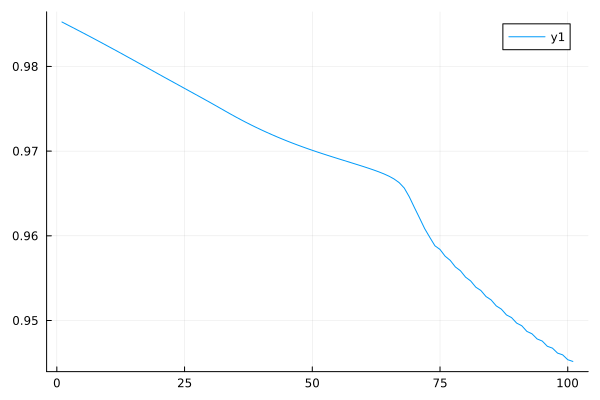

In [19]:
s8 = [sample[5] for sample in samples]
plot(s8)

In [12]:
E = [sample[end-1] for sample in samples[200:end]]#
std(E)^2/21

LoadError: MethodError: no method matching zero(::Type{Any})

[0mClosest candidates are:
[0m  zero(::Type{Union{Missing, T}}) where T
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:105[24m[39m
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [36mDates[39m [90m~/.julia/juliaup/julia-1.9.0-rc1+0.x64.linux.gnu/share/julia/stdlib/v1.9/Dates/src/[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::RecursiveArrayTools.ArrayPartition[39m, [91m::Tuple{Vararg{Int64, N}}[39m) where N
[0m[90m   @[39m [32mRecursiveArrayTools[39m [90m~/.julia/packages/RecursiveArrayTools/9mtCv/src/[39m[90m[4marray_partition.jl:89[24m[39m
[0m  ...


In [13]:
Wms = [sample[1] for sample in samples[200:end]]
std(Wms)

LoadError: MethodError: no method matching zero(::Type{Any})

[0mClosest candidates are:
[0m  zero(::Type{Union{Missing, T}}) where T
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:105[24m[39m
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [36mDates[39m [90m~/.julia/juliaup/julia-1.9.0-rc1+0.x64.linux.gnu/share/julia/stdlib/v1.9/Dates/src/[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::RecursiveArrayTools.ArrayPartition[39m, [91m::Tuple{Vararg{Int64, N}}[39m) where N
[0m[90m   @[39m [32mRecursiveArrayTools[39m [90m~/.julia/packages/RecursiveArrayTools/9mtCv/src/[39m[90m[4marray_partition.jl:89[24m[39m
[0m  ...


In [14]:
b1s = [sample[6] for sample in samples[200:end]]
std(b1s)

LoadError: MethodError: no method matching zero(::Type{Any})

[0mClosest candidates are:
[0m  zero(::Type{Union{Missing, T}}) where T
[0m[90m   @[39m [90mBase[39m [90m[4mmissing.jl:105[24m[39m
[0m  zero([91m::Union{Type{P}, P}[39m) where P<:Dates.Period
[0m[90m   @[39m [36mDates[39m [90m~/.julia/juliaup/julia-1.9.0-rc1+0.x64.linux.gnu/share/julia/stdlib/v1.9/Dates/src/[39m[90m[4mperiods.jl:51[24m[39m
[0m  zero([91m::RecursiveArrayTools.ArrayPartition[39m, [91m::Tuple{Vararg{Int64, N}}[39m) where N
[0m[90m   @[39m [32mRecursiveArrayTools[39m [90m~/.julia/packages/RecursiveArrayTools/9mtCv/src/[39m[90m[4marray_partition.jl:89[24m[39m
[0m  ...


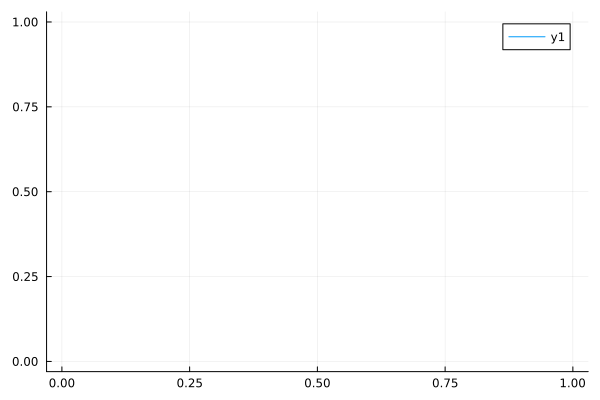

In [15]:
plot(Wms)

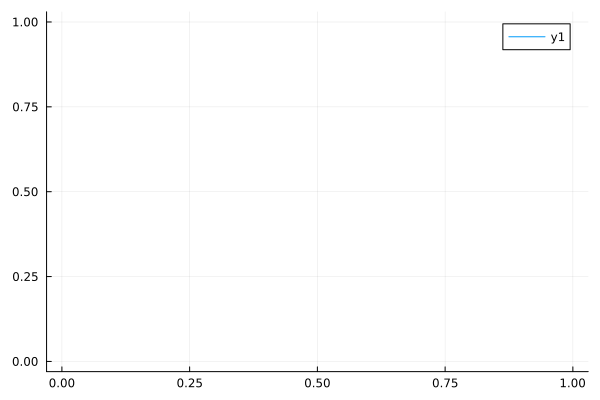

In [16]:
plot(b1s)

In [52]:
sigma = std(samples[250:1001])[1:end-2]

25-element Vector{Float64}:
 0.02955068536535341
 0.012067773602538403
 0.029934282647348584
 0.05686867204619623
 0.061697028754043974
 0.13068565245771951
 0.1442136349185697
 0.13642617666313198
 0.16866044248835593
 0.18823178869575813
 0.005635832270982163
 0.00401300921710752
 0.0030154559051012867
 0.007451034442112501
 0.011558649660224823
 0.009483716980426797
 0.008428681571452134
 0.01068023280013815
 0.046553975697859004
 0.014836095470138809
 0.011973914069191368
 0.01858972928606238
 0.017240121405785996
 0.17409931077687282
 1.0757022970158552

In [23]:
samples = sample(stat_model, spl, 1000; dialog=true)

[ Info: Using given sigma ✅
[ Info: Using given eps ✅
[ Info: Using given L ✅


LoadError: DomainError with 0.0:
integrand produced Dual{ForwardDiff.Tag{Turing.TuringTag, Float64}}(NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN) in the interval (0.0, 0.0)

## NUTS

In [39]:
samples_hmc = sample(stat_model, NUTS(100, 0.65),
                     300, progress=true; save_state=true)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
┌ Info: Found initial step size
└   ϵ = 0.0125
Sampling:   4%|█▍                                       |  ETA: 0:02:26┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC ~/.julia/packages/AdvancedHMC/4fByY/src/hamiltonian.jl:49
Sampling: 100%|█████████████████████████████████████████| Time: 1:14:57


Chains MCMC chain (300×25×1 Array{Float64, 3}):

Iterations        = 101:1:400
Number of chains  = 1
Samples per chain = 300
Wall duration     = 4502.67 seconds
Compute duration  = 4502.67 seconds
parameters        = Ωm, Ωb, h, s8, ns, DECALS__0_b, DECALS__1_b, DECALS__2_b, DECALS__3_b, DECALS__0_dz, DECALS__1_dz, DECALS__2_dz, DECALS__3_dz
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
    parameters      mean       std   naive_se      mcse        ess      rhat   ⋯
        Symbol   Float64   Float64    Float64   Float64    Float64   Float64   ⋯

            Ωm    0.2811    0.0226     0.0013    0.0024    98.0312    1.0213   ⋯
            Ωb    0.0402    0.0069     0.0004    0.0005   144.1265    1.0020   ⋯
             h    0.7376    0.0470     0.0027    0.0050   105.2713    1.0019   ⋯
            s8    0.9177   

In [15]:
summary_hmc.ess

25-element Vector{Float64}:
  107.13649180104869
  331.4835789816811
  207.484061400768
  111.64048654758332
  600.4013034569028
  114.39496059843647
  117.33719647252566
  114.56966849849671
  111.15547545924896
  105.06968640469209
  961.3377488207435
  700.0507524844818
  837.2166448905194
  682.3676139298411
  566.0490257440192
  837.5008331222044
  733.9973963424983
  549.1048795030388
  792.5424251430129
 1009.6818545217956
  763.2299996132994
  872.0250289709837
  763.7811879280131
  552.5319549420313
  731.942598764305

In [16]:
Wms_hmc = vec(samples_hmc[!, "Ωm"])
s8s_hmc = vec(samples_hmc[!, "s8"]);

In [17]:
Wm_hmc_ker = ash(Wms_hmc; m=30)
s8_hmc_ker = ash(s8s_hmc; m=30)
Wm_mchmc_ker = ash(Wms_mchmc; m=30)
s8_mchmc_ker = ash(s8s_mchmc; m=30);

LoadError: UndefVarError: `Wms_mchmc` not defined

In [18]:
Plots.plot(Wm_mchmc_ker; hist=false, label="MCHMC")
Plots.plot!(Wm_hmc_ker; hist=false, label="HMC", xlabel="Wm")

LoadError: UndefVarError: `Wm_mchmc_ker` not defined

In [19]:
Plots.plot(s8_mchmc_ker; hist=false, label="MCHMC")
Plots.plot!(s8_hmc_ker; hist=false, label="HMC",  xlabel="s8")

LoadError: UndefVarError: `s8_mchmc_ker` not defined

## Self-tuning

In [20]:
mchmc = Sampler()
println(string("L = ", mchmc.settings.L, ", eps = ", mchmc.settings.eps))
# This should start self-tuning    

LoadError: UndefVarError: `Sampler` not defined

In [21]:
mchmc.settings.tune_samples

LoadError: UndefVarError: `mchmc` not defined

In [22]:
samples = Sample(mchmc, target; num_steps=10000, dialog=true);

LoadError: UndefVarError: `Sample` not defined